<a href="https://colab.research.google.com/github/RoshniSeth/Supervised-Machine-Learning-Algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression**

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables.

Consider the below image:
<center>

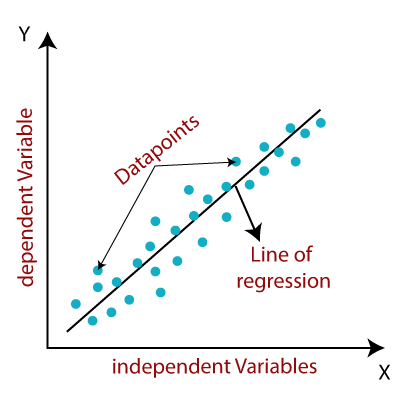
</center>

Mathematically, we can represent a linear regression as:

y= mx + c + ε

Here,

y= Dependent Variable (Target Variable)

x= Independent Variable (predictor Variable)

c= intercept of the line (Gives an additional degree of freedom)

m = Linear regression coefficient (scale factor to each input value).

ε = random error


The values for x and y variables are training datasets for Linear Regression model representation.

###**Types Of Linear Regression**

Linear Regression can be further divided into two categories:

*   **Simple Linear Regression**

    If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.


*   **Multiple Linear Regression**

    If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.







###**Simple Linear Regression**

Simple Linear Regression is a type of Regression algorithms that models the relationship between a dependent variable and a single independent variable. The relationship shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression.

The key point in Simple Linear Regression is that the dependent variable must be a continuous/real value. However, the independent variable can be measured on continuous or categorical values.

The goals of this problem is:

1. We want to find out if there is any correlation between these two
   variables.
2. We will find the best fit line for the dataset.
3. How the dependent variable is changing by changing the independent
   variable.






   

####**About the dataset**

The description for all the columns containing data for air pollutants, temperature, relative humidity and absolute humidity is provided below.

PT08.S1(CO) ->	PT08.S1 (tin oxide) hourly averaged sensor response (nominally  CO  targeted)

C6H6(GT) ->	True hourly averaged Benzene concentration in  μgm3

PT08.S2(NMHC) ->	PT08.S2 (titania) hourly averaged sensor response (nominally  NMHC  targeted)

PT08.S3(NOx) ->	PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally  NOx  targeted)

PT08.S4(NO2) ->	PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally  NO2  targeted)

PT08.S5(O3) ->	PT08.S5 (indium oxide) hourly averaged sensor response (nominally  O3  targeted)

T ->	Temperature in Â°C

RH ->	Relative Humidity (%)

AH ->	AH Absolute Humidity

In [ ]:
#importing necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Connecting the drive to colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####**Loading the Dataset**

In [ ]:
air_data=pd.read_csv('/content/drive/MyDrive/datasets/AirQualityUCI.csv',sep=';')
print(air_data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

####**Pre-processing the dataset**

In [ ]:
print("Number of rows and columns in dataset= ",air_data.shape)
print()
print("Information about dataset: ")
print()
print(air_data.info())
print()
print("Null values in the dataset: ")
print()
print(air_data.isnull().sum())

Number of rows and columns in dataset=  (9471, 17)

Information about dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    

**Analysis**-> In the above dataset, we have 9471 rows and 17 columns in total. From these rows and columns, the last two columns are null and there are 114 rows having null values. Since all the values in these rows and columns are null so we will drop them.

In [ ]:
# Dropping Unnamed: 15 and Unnamed: 16 columns from the dataset

air_data=air_data.drop(columns=["Unnamed: 15","Unnamed: 16"],axis=1)
print(air_data.head())

         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

In [ ]:
# Dropping the null values from the dataset

air_data=air_data.dropna()
print(air_data.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
# Creating the pandas series containing datetime objects

dt_series=pd.Series(data=[item.split('/')[2] + '-' + item.split('/')[1] + '-' + item.split('/')[0] for item in air_data['Date']],index=air_data.index) + ' ' + pd.Series(data=[str(item).replace(".", ":") for item in air_data['Time']], index=air_data.index)
dt_series=pd.to_datetime(dt_series)
print(dt_series.head())

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
2   2004-03-10 20:00:00
3   2004-03-10 21:00:00
4   2004-03-10 22:00:00
dtype: datetime64[ns]


In [ ]:
# Remove the date and time columns from the dataframe

air_data=air_data.drop(columns=['Date','Time'],axis=0)
print(air_data)

     CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0       2,6       1360.0     150.0     11,9         1046.0    166.0   
1         2       1292.0     112.0      9,4          955.0    103.0   
2       2,2       1402.0      88.0      9,0          939.0    131.0   
3       2,2       1376.0      80.0      9,2          948.0    172.0   
4       1,6       1272.0      51.0      6,5          836.0    131.0   
...     ...          ...       ...      ...            ...      ...   
9352    3,1       1314.0    -200.0     13,5         1101.0    472.0   
9353    2,4       1163.0    -200.0     11,4         1027.0    353.0   
9354    2,4       1142.0    -200.0     12,4         1063.0    293.0   
9355    2,1       1003.0    -200.0      9,5          961.0    235.0   
9356    2,2       1071.0    -200.0     11,9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13,6  48,9  0,

In [ ]:
# Inserting the dt_series column into the dataframe

air_data.insert(loc=0,column='DateTime',value=dt_series)
print(air_data.head())

             DateTime CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00    2,6       1360.0     150.0     11,9         1046.0   
1 2004-03-10 19:00:00      2       1292.0     112.0      9,4          955.0   
2 2004-03-10 20:00:00    2,2       1402.0      88.0      9,0          939.0   
3 2004-03-10 21:00:00    2,2       1376.0      80.0      9,2          948.0   
4 2004-03-10 22:00:00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,7867  
4  0,788

In [ ]:
# Creating pandas series containing the year values as integers
year_series=air_data['DateTime'].dt.year
#print(year_series.value_counts())

# Creating pandas series containing the month values as integers
month_series=air_data['DateTime'].dt.month
#print(month_series.value_counts())

# Creating pandas series containing the day values as integers
day_series=air_data['DateTime'].dt.day
#print(day_series.value_counts())

# Cretaing pandas series containing the days of week
day_name_series=air_data["DateTime"].dt.day_name()
#print(day_name_series.value_counts())

In [ ]:
# Inserting all the above created series into the dataframe

air_data['Year']=year_series
air_data['Month']=month_series
air_data['Day']=day_series
air_data['Day Name']=day_name_series

print(air_data.head(10))

             DateTime CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00    2,6       1360.0     150.0     11,9         1046.0   
1 2004-03-10 19:00:00      2       1292.0     112.0      9,4          955.0   
2 2004-03-10 20:00:00    2,2       1402.0      88.0      9,0          939.0   
3 2004-03-10 21:00:00    2,2       1376.0      80.0      9,2          948.0   
4 2004-03-10 22:00:00    1,6       1272.0      51.0      6,5          836.0   
5 2004-03-10 23:00:00    1,2       1197.0      38.0      4,7          750.0   
6 2004-03-11 00:00:00    1,2       1185.0      31.0      3,6          690.0   
7 2004-03-11 01:00:00      1       1136.0      31.0      3,3          672.0   
8 2004-03-11 02:00:00    0,9       1094.0      24.0      2,3          609.0   
9 2004-03-11 03:00:00    0,6       1010.0      19.0      1,7          561.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       

In [ ]:
# Sort the DataFrame by the 'DateTime' values in the ascending order
air_data=air_data.sort_values(by="DateTime")
print(air_data.head(10))

             DateTime CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00    2,6       1360.0     150.0     11,9         1046.0   
1 2004-03-10 19:00:00      2       1292.0     112.0      9,4          955.0   
2 2004-03-10 20:00:00    2,2       1402.0      88.0      9,0          939.0   
3 2004-03-10 21:00:00    2,2       1376.0      80.0      9,2          948.0   
4 2004-03-10 22:00:00    1,6       1272.0      51.0      6,5          836.0   
5 2004-03-10 23:00:00    1,2       1197.0      38.0      4,7          750.0   
6 2004-03-11 00:00:00    1,2       1185.0      31.0      3,6          690.0   
7 2004-03-11 01:00:00      1       1136.0      31.0      3,3          672.0   
8 2004-03-11 02:00:00    0,9       1094.0      24.0      2,3          609.0   
9 2004-03-11 03:00:00    0,6       1010.0      19.0      1,7          561.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       

In [ ]:
# Creating a function to replace commas with periods in pandas series
def comma_to_period(series):
  new_series=pd.Series(data=[float(str(item).replace(',','.')) for item in series],index=air_data.index)
  return new_series

 # List of columns to be corrected
columns_to_correct=['CO(GT)','C6H6(GT)','T','RH','AH']

# Applying the comma_to_period function to the columns to be created
for column in columns_to_correct:
  air_data[column]=comma_to_period(air_data[column])

print(air_data.head())


             DateTime  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0 2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
1 2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2 2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
3 2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
4 2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  Year  Month  Day   Day Name  
0  0.7578  2004

In [ ]:
# Removing all the columns from the air_data datatframe which contains more than 10% of garbage value
air_data=air_data.drop(columns=['CO(GT)','NMHC(GT)','NOx(GT)','NO2(GT)'],axis=1)
print(air_data.head())

             DateTime  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  \
0 2004-03-10 18:00:00       1360.0      11.9         1046.0        1056.0   
1 2004-03-10 19:00:00       1292.0       9.4          955.0        1174.0   
2 2004-03-10 20:00:00       1402.0       9.0          939.0        1140.0   
3 2004-03-10 21:00:00       1376.0       9.2          948.0        1092.0   
4 2004-03-10 22:00:00       1272.0       6.5          836.0        1205.0   

   PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  Year  Month  Day   Day Name  
0        1692.0       1268.0  13.6  48.9  0.7578  2004      3   10  Wednesday  
1        1559.0        972.0  13.3  47.7  0.7255  2004      3   10  Wednesday  
2        1555.0       1074.0  11.9  54.0  0.7502  2004      3   10  Wednesday  
3        1584.0       1203.0  11.0  60.0  0.7867  2004      3   10  Wednesday  
4        1490.0       1110.0  11.2  59.6  0.7888  2004      3   10  Wednesday  


In [ ]:
# Creating a dataframe for the year 2004 and 2005 separately
air_data_2004=air_data[air_data['Year']==2004]
air_data_2005=air_data[air_data['Year']==2005]
print(type(air_data_2005))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Replacing the -200 value in each column with the median values of the columns lying between the indices[1:-4] for air_data_2004 dataframe
for col in air_data_2004.columns[1:-4]:
  median=air_data_2004.loc[air_data_2004[col] != -200,col].median()
  air_data_2004[col]=air_data_2004[col].replace(to_replace=-200,value=median)


In [ ]:
# Replacing the -200 value in each column with the median values of the columns lying between the indices[1:-4] for air_data_2005 dataframe
for col in air_data_2005.columns[1:-4]:
  median=air_data_2005.loc[air_data_2005[col] != -200,col].median()
  air_data_2005[col]=air_data_2005[col].replace(to_replace=-200,value=median)


In [ ]:
#Grouping the dataframes about the month column
group_2004_month=air_data_2004.groupby("Month")
group_2005_month=air_data_2005.groupby("Month")

In [ ]:
# Concatenating the two yearly dataframes into one dataframe
air_data=pd.concat([air_data_2004,air_data_2005])
#print(air_data.head())
print(air_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       9357 non-null   datetime64[ns]
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   PT08.S3(NOx)   9357 non-null   float64       
 5   PT08.S4(NO2)   9357 non-null   float64       
 6   PT08.S5(O3)    9357 non-null   float64       
 7   T              9357 non-null   float64       
 8   RH             9357 non-null   float64       
 9   AH             9357 non-null   float64       
 10  Year           9357 non-null   int32         
 11  Month          9357 non-null   int32         
 12  Day            9357 non-null   int32         
 13  Day Name       9357 non-null   object        
dtypes: datetime64[ns](1), float64(9), int32(3), object(1)
memory usage: 986.9+ KB

**Analysis**-> In the above dataset, we have 9471 rows and 17 columns in total. From these rows and columns, the last two columns are null and there are 114 rows having null values. Since all the values in these rows and columns are null so we have drop them. Then we have created the pandas series having the datetime objects. The dataset already includes date and time column so we will drop these two columns and in place of them we will be adding the new created datettime objects pandas series. After that we have created the pandas series containing year,month, day, day name values separately and inserted these pandas series to the dataset and sorted the dataset by datetime column. There is error in some values in the dataset that the commas are wriiten in place of periods so we have created a function replacing all the commas in the values with the periods.Then we dropped all those columns containing more than 10% of garbage value. The dataframe is then grouped by year and then  the each column having values equal to -200 are replaced with the median value of the each column and then the dataframe is grouped by month and at last after all the preprocessing the grouped dataframes are concatenated into a single dataframe stored into the air_data variable. This dataset completely contain correct values and can be used further.

####**Finding Correlation Between the Columns**

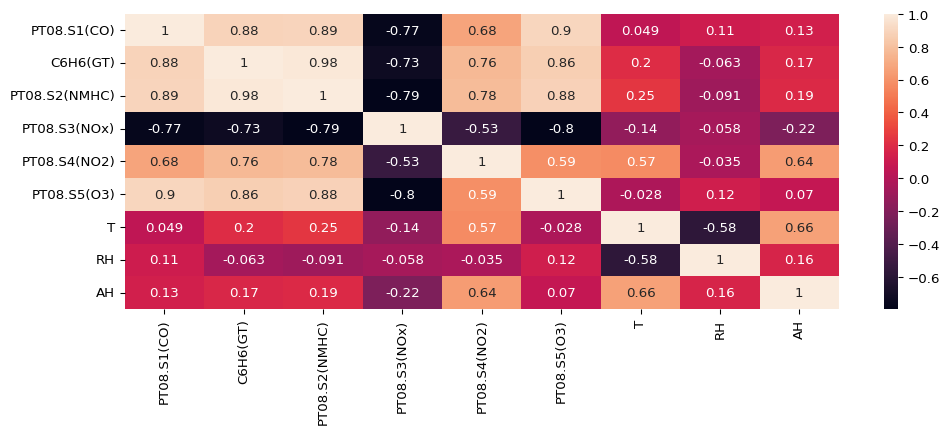

In [ ]:
corr_df=air_data.iloc[:,1:-4].corr()
plt.figure(figsize=(12,4),dpi=96)
sns.heatmap(data=corr_df,annot=True)
plt.show()

**Analysis**->Before fitting the linear regression model we must know the correlation between the columns in the dataframe. So we will plot a heatmap to find the correlation between the columns.

####**Best Fit Line**

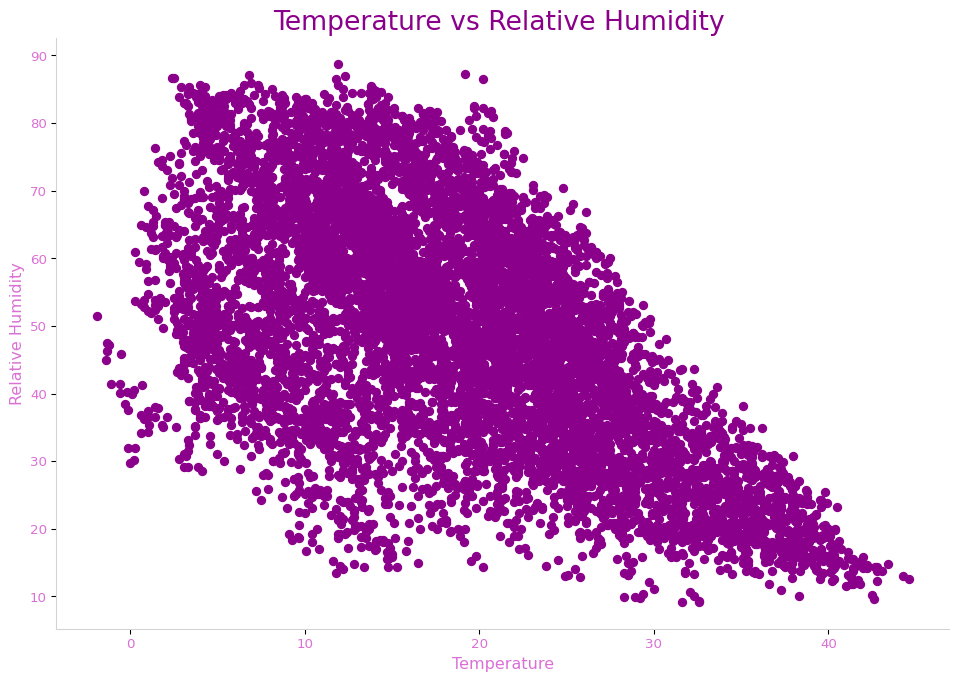

In [ ]:
plt.figure(figsize=(12,8),dpi=96)
plt.scatter(x=air_data['T'],y=air_data['RH'],c='darkmagenta')
plt.title("Temperature vs Relative Humidity ",fontsize=20,color='darkmagenta')
plt.xlabel("Temperature",fontsize=12,color='orchid')
plt.ylabel("Relative Humidity",fontsize=12,color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['right'].set_color('white')
plt.show()

**Analysis**-> In simple regression, we have one independent variable which is used to predict the dependent variable. In this case we have taken temperature as the independent variable which will be used to predict the relative humidity which is the dependent variable.

In the above cell, we have plotted a scatter plot temperature vs relative humidity. On analysing the plot we find that a linear pattern is followed by the points.

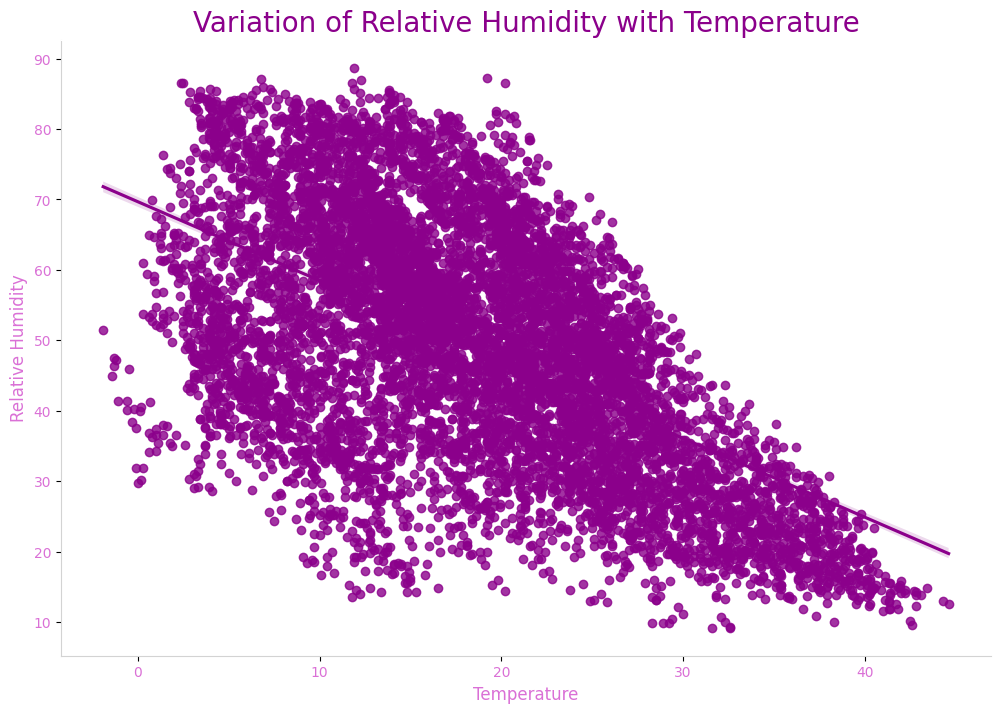

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x='T',y='RH',data=air_data,color='darkmagenta')
plt.title("Variation of Relative Humidity with Temperature",fontsize=20,color='darkmagenta')
plt.xlabel("Temperature",fontsize=12,color='orchid')
plt.ylabel("Relative Humidity",fontsize=12,color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['right'].set_color('white')
plt.show()


**Analysis**-> In the above cells, we have created a regression plot to understand how a straight line fits most of the points because in linear regression we have to basically find the straight line that fits most of the points.



The above regression plot shows a straight line having a negative slope that passes through these points and tries to fit most of them.




In simple linear regression, our job is to find this straight line which is called the best fit line.


Let's try to simulate a few possible lines that can pass through these points in an attempt to fit them.


Let the equation of the best fit line be
y=mx+c

Here,

y  represents the relative humidity values on the  y -axis

x  represents the temperatures values on the  x -axis

m  is the slope of the line

c  is the intercept made by the line on the  y -axis

The above equation can also be written as
relative humidity = m × temperature + c

####**Splitting the dataset into train and test set**

In [ ]:
# Splitting the dataset into the traget and feature values
x=air_data['T']
y=air_data['RH']
#print(x.head())
#print(y.head())

# Splitting the target and feature values into train and test cells

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6238,)
(3119,)
(6238,)
(3119,)


**Analysis**-> The dataset contains 14 columns in which the temperature will be consider as the independent variable and the relative humidity will be consider as the dependent variable.

Since the independent and dependent variables contains only single column so we have given directly the column names to get the required columns.

####**Creating Two Dimensional Arrays for train and test set values**

In [ ]:
print(type(x_train.values))
x_train_reshaped=x_train.values.reshape(-1,1)
y_train_reshaped=y_train.values.reshape(-1,1)
x_test_reshaped=x_test.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

<class 'numpy.ndarray'>
(6238, 1)
(3119, 1)
(6238, 1)
(3119, 1)


**Analysis**-> There is a prerequisite to the `sklearn.linear_model` module that the feature and target variable sets should be two-dimensional arrays. So we have reshaped the feature and the target variable arrays into two-dimensional arrays as currently they are one-dimensional arrays.

####**Model Deployment**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_reshaped,y_train_reshaped)
print(np.round(regressor.coef_,3))
print(np.round(regressor.intercept_,3))

[[-1.122]]
[69.901]


 For providing training or fitting the model to the training set, we have imported the LinearRegression class from the linear_model module of the sklearn library.

After importing the class, we have created a regressor object and use it to fit the model to the LinearRegression class.
The slope is -1.12242196 and the intercept is 69.9006322.

####**Evaluation of Model**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
y_train_predict=regressor.predict(x_train_reshaped)
y_test_predict=regressor.predict(x_test_reshaped)

print(f"Train Set\n {'-'*50}")
print(f"R-Squared: {r2_score(y_train_reshaped,y_train_predict):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped,y_train_predict):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped,y_train_predict):.3f} ")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped,y_train_predict)):.3f}")
print()
print(f"Test Set\n {'-'*50}")
print(f"R-Squared: {r2_score(y_test_reshaped,y_test_predict):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped,y_test_predict):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped,y_test_predict):.3f} ")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped,y_test_predict)):.3f}")


Train Set
 --------------------------------------------------
R-Squared: 0.333
Mean Squared Error: 189.696
Mean Absolute Error: 11.153 
Root Mean Squared Error: 13.773

Test Set
 --------------------------------------------------
R-Squared: 0.328
Mean Squared Error: 198.285
Mean Absolute Error: 11.398 
Root Mean Squared Error: 14.081


**Analysis**-> In the above cells we have evaluated the r- squared error, absolute mean error, mean squared error and root mean squared error for both the train and test sets.


The closer the MSE, RMSE and MAE values are to zero, the better is accuracy of a regression-based prediction model. However, in the case of fractional values (or values between 0 and 1), MAE is a better metric to evaluate the accuracy of a regression-based prediction model. This is because squaring fractional values will take them even more close to zero, e.g.  $0.1^2$=0.01


Here the  MSE, RMSE and MAE  values are not 0 which means errors are not 0 so the model is not good and $R^2$ must be equal to 1 for better performance of the model.

####**Residual (Error) Analysis**

Before we can make a conclusion whether a prediction model is acceptable or not, we need to analyse residuals (or errors) to validate the assumptions of a linear regression model. Hence, the reliability of inference.

In the residual analysis, we need to check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression). Why? Because, formally, a simple linear regression model is given as

Y=β0+β1x+ϵ

where

x  is the independent variable

Y  is the response to the independent variable (or predicted value or dependent variable)

β0  (intercept made by the best fit line with the  y -axis) and  β1  (slope of the best fit line) are called regression coefficients

ϵ  is the random error obtained along with the predicted value

For a line to be the best fit line, the mean of random errors i.e. mean of  ϵ  should be 0.

**For Training Set**

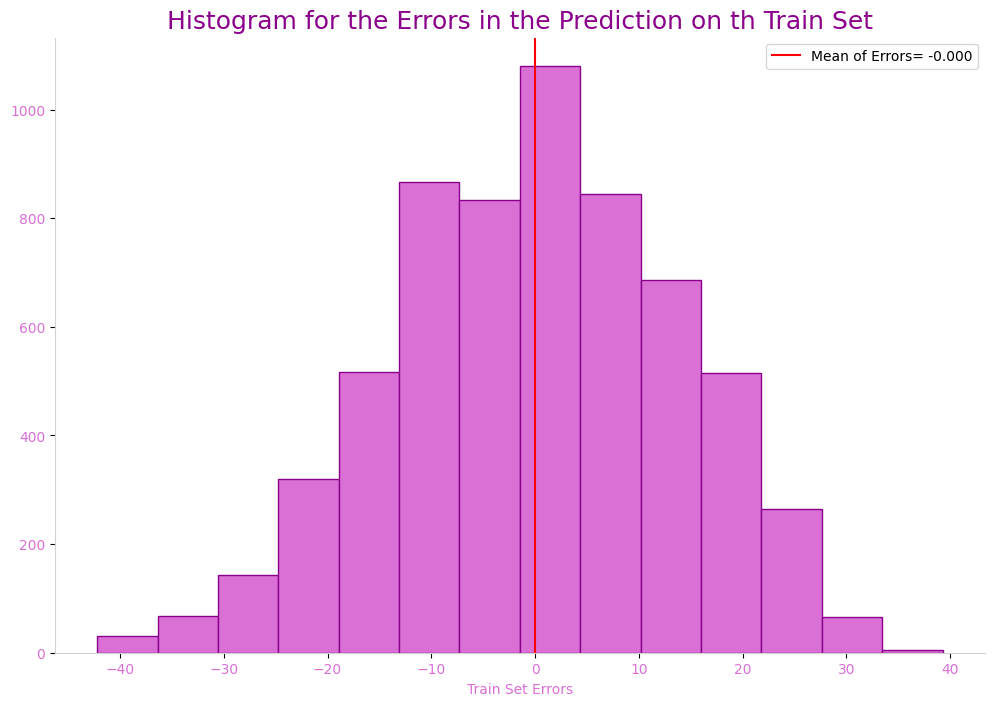

In [ ]:
errors_train=y_train_reshaped-y_train_predict

plt.figure(figsize=(12,8))
plt.hist(errors_train,bins='sturges',edgecolor='darkmagenta',color='orchid')
plt.title("Histogram for the Errors in the Prediction on th Train Set",fontsize=18,color='darkmagenta')
plt.axvline(x=errors_train.mean(),label=f"Mean of Errors= {errors_train.mean():.3f}",color='red')
plt.xlabel("Train Set Errors",color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.legend()
plt.show()

**Analysis**-> We have plotted a histogram to visualize the errors fro the train set. From the histogram we clearly find that the mean of errors is zero for the training set.

The residuals (or errors) somewhat follow a normal distribution with a mean equal to 0 which is what required. If the mean of errors between the actual and the predicted values is not equal to zero, then you need to rebuild the linear regression model probably with a different independent (or feature) variable.

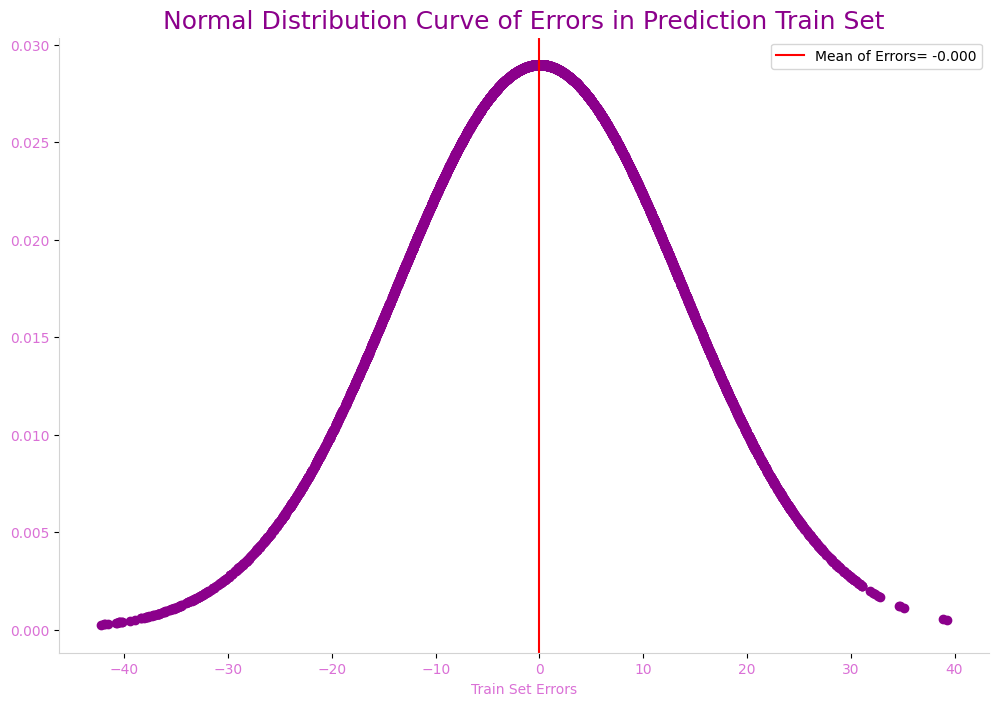

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(12,8))
plt.scatter(errors_train,norm.pdf(errors_train,errors_train.mean(),errors_train.std()),color='darkmagenta')
plt.axvline(x=errors_train.mean(),color='red',label=f"Mean of Errors= {errors_train.mean():.3f}")
plt.title("Normal Distribution Curve of Errors in Prediction Train Set",color='darkmagenta',fontsize=18)
plt.xlabel('Train Set Errors',color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.legend()
plt.show()

**Analysis**-> We have applied the probability density function using the norm.pdf() function of the scipy.stats module. To apply this function, we need to:

Import the norm object from the scipy.stats module.

Call the pdf() function on the norm object. It takes two inputs:

The mean of the values

The standard deviation of the value


We have plotted a normal distribution curve using scatter plot to visualize the errors for the train set. From the curve we find clearly find that the mean of errors is zero for the training set.

**For Test Set**

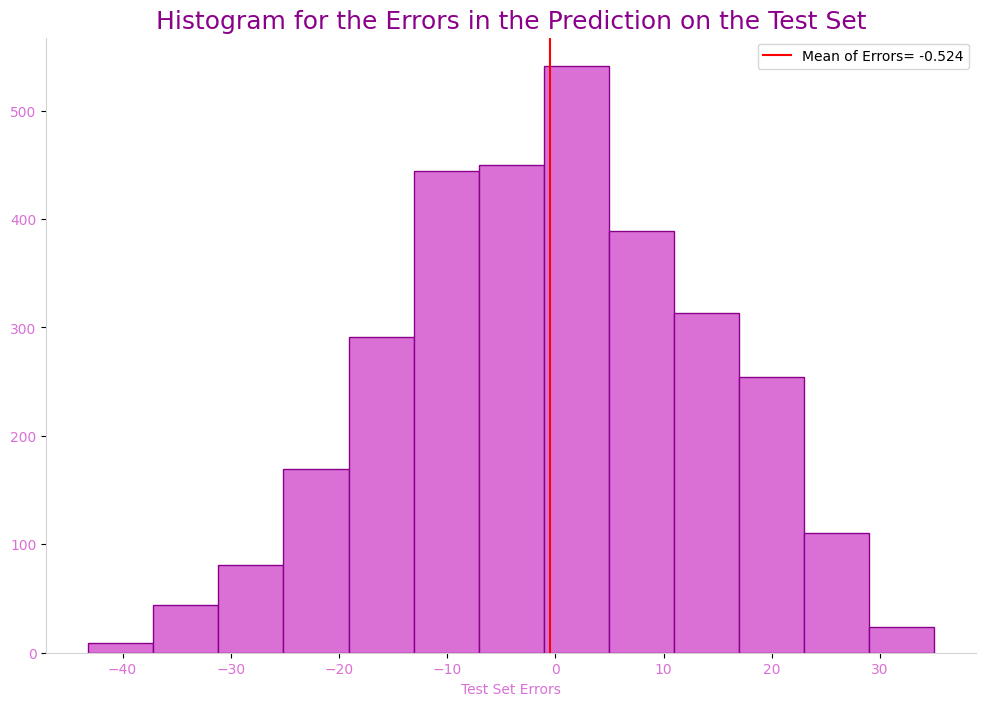

In [ ]:
errors_test=y_test_reshaped-y_test_predict

plt.figure(figsize=(12,8))
plt.hist(errors_test,bins='sturges',edgecolor='darkmagenta',color='orchid')
plt.title("Histogram for the Errors in the Prediction on the Test Set",fontsize=18,color='darkmagenta')
plt.axvline(x=errors_test.mean(),label=f"Mean of Errors= {errors_test.mean():.3f}",color='red')
plt.xlabel("Test Set Errors",color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.legend()
plt.show()

**Analysis**-> We have plotted a histogram to visualize the errors for the test set. From the histogram we find clearly that the mean of errors is not zero for the test set which shows that the model is not performing good and we have to rebuild it.

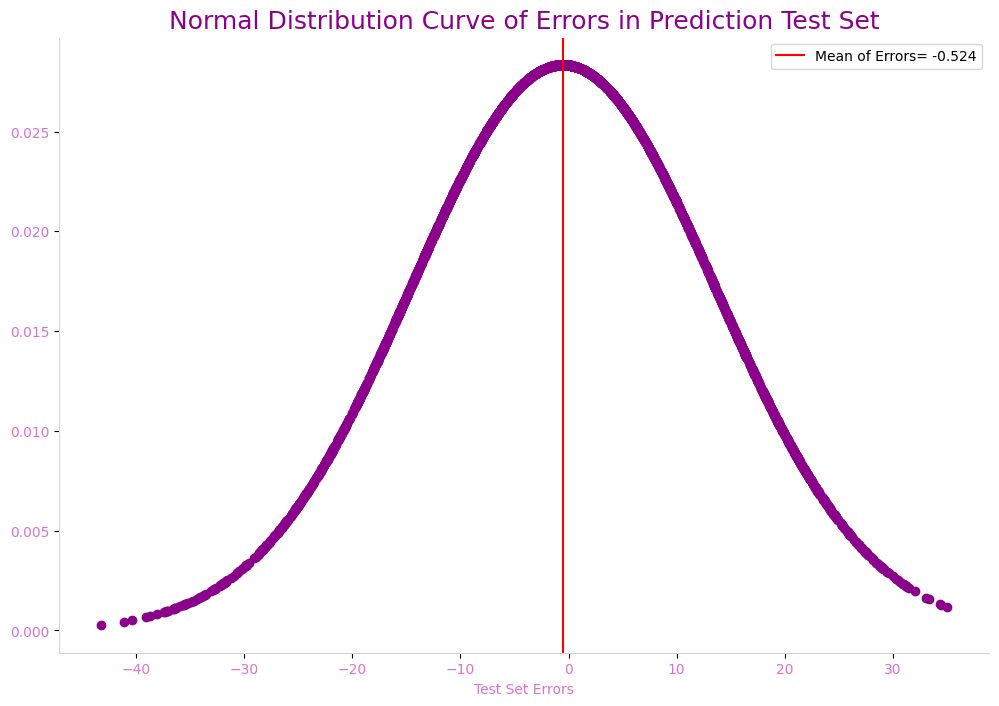

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(12,8))
plt.scatter(errors_test,norm.pdf(errors_test,errors_test.mean(),errors_test.std()),color='darkmagenta')
plt.axvline(x=errors_test.mean(),color='red',label=f"Mean of Errors= {errors_test.mean():.3f}")
plt.title("Normal Distribution Curve of Errors in Prediction Test Set",color='darkmagenta',fontsize=18)
plt.xlabel('Test Set Errors',color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.legend()
plt.show()

**Analysis**-> We have plotted a normal distribution curve using scatter plot to visualize the errors for the test set. From the curve we clearly find that the mean of errors is not zero for the test set which means that the model is not performing good and we have to rebuild it.

####**Homoscedasticity & Heteroscedasticity**

In addition to checking for the mean of errors, you also need to check for the trend in the scatter plot between the errors and the feature and target variables. There should not be a trend.

**Homoscedasticity**

In literal terms, homo means same and scedasticity means variance. So homoscedasticity means the same or constant variance. Homoscedasticity is good for us.

The term 'Homoscedasticity' describes a situation where the variability of a variable (often the dependent variable) is the same across all levels of the independent variable(s). In other words, the spread of the residuals (the differences between observed and predicted values) is consistent across the range of the independent variable(s). This is an important assumption in many regression techniques, including ordinary least squares (OLS) regression.

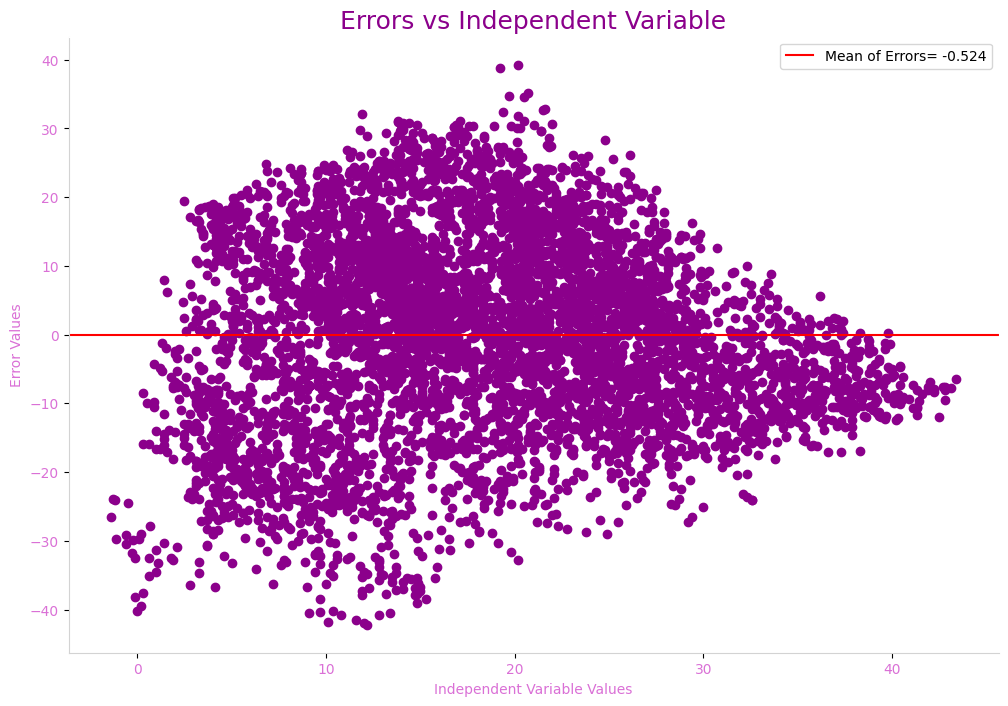

In [ ]:
# Scatter plot between the errors and the independent variable for the train test
plt.figure(figsize=(12,8))
plt.scatter(x_train,errors_train,color='darkmagenta')
plt.axhline(y=errors_train.mean(),color='red',label=f"Mean of Errors= {errors_test.mean():.3f}")
plt.title("Errors vs Independent Variable",color='darkmagenta',fontsize=18)
plt.xlabel('Independent Variable Values',color='orchid')
plt.ylabel('Error Values',color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.legend()
plt.show()

There is hardly any noticeable trend between the errors in the train set and the independent variable. This means the variance in the errors for the train set is approximately constant i.e. it is not changing much except for the rightmost points in the scatter plot. Hence, there is homoscedasticity between the errors w.r.t. the independent variable.

**Heteroscedasticity**

In literal terms, hetero means different and scedasticity means variance. So homoscedasticity means the different or varying variance. Heteroscedasticity is not good for us.

 Conversely, heteroscedasticity refers to a situation where the variability of a variable is different across levels of the independent variable(s). In this case, the spread of the residuals varies as a function of the independent variable(s). Heteroscedasticity violates the assumption of constant variance of the errors and can lead to biased and inefficient estimates of the regression coefficients.Detecting and addressing heteroscedasticity is crucial in regression analysis to ensure the reliability of the results.

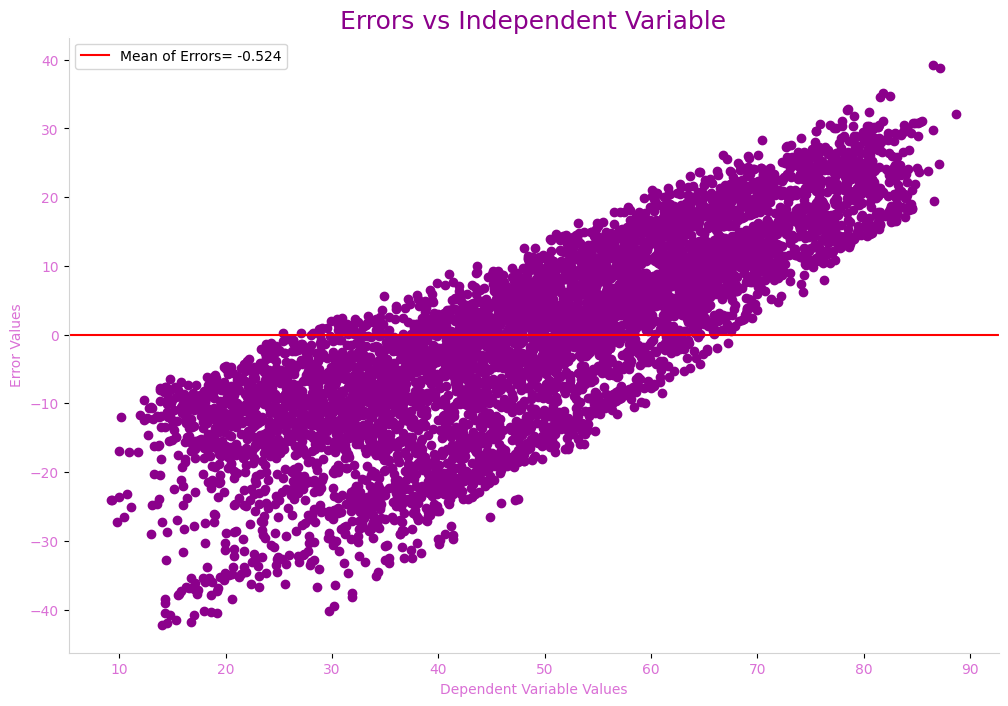

In [ ]:
# Scatter plot between the errors and the dependent variable for the train test
plt.figure(figsize=(12,8))
plt.scatter(y_train,errors_train,color='darkmagenta')
plt.axhline(y=errors_train.mean(),color='red',label=f"Mean of Errors= {errors_test.mean():.3f}")
plt.title("Errors vs Independent Variable",color='darkmagenta',fontsize=18)
plt.xlabel('Dependent Variable Values',color='orchid')
plt.ylabel('Error Values',color='orchid')
plt.xticks(color='orchid')
plt.yticks(color='orchid')
plt.gca().spines['bottom'].set_color('lightgrey')
plt.gca().spines['left'].set_color('lightgrey')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['top'].set_color('white')
plt.legend()
plt.show()

There is some clear trend between errors and the dependent variable for the train set. This means the variance in the error terms is varying from left-to-right. Hence, there is heteroscedasticity (not same variance) between the errors w.r.t. the dependent variables. This is not a good thing for us.

####**Model Analysis**

On evaluating all the necessary steps we find that the values of MAE, MSE, RMSE,is very high and the value of $R^2$ is very low for both the training and test sets.

On visualising the errors we find that the mean of the errors is zero for the training set but the mean of the errors is not equal to zero but is close to zero for the test set.

On plotting a Scatter Plot, we find that there is homoscedasticity between the errors and independent variable for the train set but there is heteroscedasticity between the errors and the dependent variable for the train set which is not good for us.



So after going through all the necessary evaluation steps, we can say that our linear regression model is poor.

      relative humidity = −1.112 × temperature + 69.691


Hence, we can need to rebuild the linear regression model with more feature (or independent) variables. This is where we have to implement multiple linear regression to build a more accurate prediction model.

##**Multiple Linear Regression**

There may be various cases in which the dependent variable is affected by more than one independent variable; for such cases, the Multiple Linear Regression algorithm is used.


Multiple Linear Regression is one of the important regression algorithms which models the linear relationship between a single dependent continuous variable and more than one independent variable.It is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable.

Some key points about Multiple Linear Regression:

*   For MLR, the dependent or target variable(Y) must be the
    continuous/real, but the predictor or independent variable may be of continuous or categorical form.
*  Each feature variable must model the linear relationship with the
   dependent variable.
*   MLR tries to fit a regression line through a multidimensional
    space of data-points.




####**Assumptions for Multiple Linear Regression**

* A linear relationship should exist between the Target and predictor
  variables.  
* The regression residuals must be normally distributed.
* MLR assumes little or no multicollinearity (correlation between the
  independent variable) in data.




We haved already done the preprocessing part of the dataset in the above cells. So we will be directly fitting the model by splitting the dataset into the target and test set.

####**Splitting the dataset into train and test set**

In [ ]:
features=list(air_data.columns.values[1:-1])
# print(features)
features.remove('RH')
# print(features)

# Splitting the dataset into the target and feature values
x=air_data[features]
y=air_data['RH']
# print(x.head())
# print(y.head())

# Splitting the target and feature values into train and test cells

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6238, 11)
(3119, 11)
(6238,)
(3119,)


**Analysis**-> The dataset contains 14 columns from which all the columns expect DateTime column at index 0 and Day Name column at index -1 will be consider as the independent variables (excluding relative humidity column) and the relative humidity will be consider as the dependent variable.

Since the independent variables contains multiple columns so we have created a list named as features which includes all the names of the columns which are taken as independent variables. The dependent variable includes only single column so we have given directly the column name to get the required column.

####**Creating Two Dimensional Arrays for train and test set values**

In [ ]:
print(type(x_train.values))
y_train_reshaped=y_train.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

print(y_train_reshaped.shape)
print(y_test_reshaped.shape)

<class 'numpy.ndarray'>
(6238, 1)
(3119, 1)


**Analysis**-> There is a prerequisite to the `sklearn.linear_model` module that the feature and target variable sets should be two-dimensional arrays. So we have reshaped the target variable array into two-dimensional array as currently it is one-dimensional array. The feature variable set is already a two-dimensional array so no need to reshape it.

####**Model Deployment**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train_reshaped)

# Calculating the value of intercept i.e.  beta-sub-0
print("\nConstant".ljust(15, " "), f"{regressor.intercept_[0]:.6f}")

# Calculating the value of coefficients
for item in list(zip(x.columns.values, regressor.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}")


Constant       -12894.173567
PT08.S1(CO)     0.013719
C6H6(GT)        -0.843560
PT08.S2(NMHC)   -0.006032
PT08.S3(NOx)    0.000186
PT08.S4(NO2)    0.024981
PT08.S5(O3)     -0.001096
T               -2.377316
AH              30.060226
Year            6.442596
Month           1.054824
Day             0.036553


**Analysis**-> For providing training or fitting the model to the training set, we have imported the LinearRegression class from the linear_model module of the sklearn library.

After importing the class, we have created a regressor object and use it to fit the model to the LinearRegression class.
The value of all the coefficients are printed in the above cell. The constant is 64.733289.

As we can see, the coefficients for a few of the features have a very low value and the intercept ($\beta_0$) is very high in comparison. We will analyse the significance of these values as we proceed forward. For the time being, let's compute the $R^2$, MSE, RMSE and MAE values.

####**Evaluation Of $R^2$, MSE, RMSE, MAE**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

y_train_predict=regressor.predict(x_train)
y_test_predict=regressor.predict(x_test)

print(f"Train Set\n{'-'*50}")
print(f"R-Squared: {r2_score(y_train_reshaped,y_train_predict):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped,y_train_predict):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped,y_train_predict)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped,y_train_predict):.3f}")
print()
print(f"Test Set\n{'-'*50}")
print(f"R-Squared: {r2_score(y_test_reshaped,y_test_predict):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped,y_test_predict):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped,y_test_predict)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped,y_test_predict):.3f}")


Train Set
--------------------------------------------------
R-Squared: 0.879
Mean Squared Error: 34.542
Root Mean Squared Error: 5.877
Mean Absolute Error: 4.538

Test Set
--------------------------------------------------
R-Squared: 0.878
Mean Squared Error: 35.890
Root Mean Squared Error: 5.991
Mean Absolute Error: 4.600


**Analysis**-> In the above cells we have evaluated the r- squared error, absolute mean error, mean squared error and root mean squared error for both the train and test sets.


The closer the MSE, RMSE and MAE values are to zero, the better is accuracy of a regression-based prediction model. However, in the case of fractional values (or values between 0 and 1), MAE is a better metric to evaluate the accuracy of a regression-based prediction model. This is because squaring fractional values will take them even more close to zero, e.g.  $0.1^2$=0.01


here the mse,rmse,mae values are not 0 which means errors are not 0 so the model is not good and $r^2$ must be equal to 1 for better performance of the model.

When we built the linear regression model with only the temperature as the independent variable, the $R^2$ value was 32.46% approximately. Now it has increased to 87.9% because of having more features which is a great improvement as the $R^2$ value should be close to 1. This means the unexplained variance in the regression model is only 12.1%. The MSE, RMSE and MAE values are also not too high.

So by looking at these metrics, we may tend to think that we have built a very good model but how do we make sure. For this, we need to measure the significance of the coefficients of all the features including the constant as well. This is the point where we will use the `statsmodels.api` module in Python.

####**Statsmodel.api Module**

The statsmodels module is another Python module that you can use to build a linear regression model and also assess whether a feature is useful or in technical terms significant.

In [ ]:
# Splitting the dataframe into independent and dependent variables
x=air_data[features]
y=air_data["RH"]
#print(x.head())
#print(y.head())

# Splitting the independent and dependent variables into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6269, 11)
(3088, 11)
(6269,)
(3088,)


**Analysis**-> We have again created the dataframes for the dependent and independent variables and splitted them into the train and test set for building the linear egression model using ststmodels.appi module in python.

In [ ]:
# Build a linear regression model using the 'statsmodels.api' module.
import statsmodels.api as sm

# add a constant to get an intercept
x_train_sm=sm.add_constant(X_train)

# fit the regression line using ols
sm_lin_reg=sm.OLS(y_train,x_train_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(sm_lin_reg.params)


const           -12730.753313
PT08.S1(CO)          0.013756
C6H6(GT)            -0.834914
PT08.S2(NMHC)       -0.006379
PT08.S3(NOx)        -0.000018
PT08.S4(NO2)         0.024962
PT08.S5(O3)         -0.001150
T                   -2.376220
AH                  30.034269
Year                 6.361305
Month                1.049035
Day                  0.036735
dtype: float64


**Analysis**-> The `add_constant()` function of `statsmodels.api` module takes the feature set as an input. It initialises the $\beta_0$ (or constant) with some arbitrary value and then seeks the best value for it through the **ordinary least squares** method.

We have Created an object of the `OLS` class and call the `fit()` function to build a linear regression model. The constructor of the `OLS` class has taken the target and features as inputs (in that order) and builds a linear regression model.

Finally, the `params` attribute of the `OLS` class is used to get the values of all the coefficients.

On comparison we found that the above values for the constant and the coefficients of all the features are almost the same as the ones obtained through the `sklearn` linear regression model.

In [ ]:
# Subtract the constant and the coefficient values obtained through sklearn model and statsmodels.api
print(sm_lin_reg.params[0]-regressor.intercept_[0])
print(sm_lin_reg.params[1:]-regressor.coef_[0])

163.42025464704784
PT08.S1(CO)      0.000037
C6H6(GT)         0.008646
PT08.S2(NMHC)   -0.000347
PT08.S3(NOx)    -0.000204
PT08.S4(NO2)    -0.000019
PT08.S5(O3)     -0.000054
T                0.001095
AH              -0.025956
Year            -0.081291
Month           -0.005789
Day              0.000182
dtype: float64


**Analysis**-> On subtracting the constant and the coefficient values obtained through sklearn model and statsmodels.api we found that the features are almost the same as the ones obtained through the `sklearn` linear regression model because we can see that the above values are practically  0  because their scale is at least   $10^{-11}$ or $\frac{1}{10^{11}}$.

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(sm_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     4121.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:51:38   Log-Likelihood:                -19996.
No. Observations:                6269   AIC:                         4.002e+04
Df Residuals:                    6257   BIC:                         4.010e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.273e+04   1214.567    -10.482

**Analysis**-> We have printed the statistical summary of the regression model that we built to find the significant features based on p-value.



For a feature to be statistically significant, the p-value should be equal to or less than 0.05. From the above table, `PT08.S3(NOx)` and `PT08.S5(O3)` have the p-values greater than 0.05. Hence, they are statistically insignificant for the regression model created. So you may have to eliminate these features.

Also, on reading the second warning obtained in the summary, It says `The condition number is large, 5.25e+07. This might indicate that there are strong multicollinearity or other numerical problems.`

So now we have to work on mutlicollinearity.



Before working on the concept of multicollinearity we must know the concept of Ordinary Least Squares



####**Ordinary Least Squares**

Ordinary Least Squares regression (OLS) is a common technique for estimating coefficients of linear regression equations which describe the relationship between one or more independent quantitative variables and a dependent variable (simple or multiple linear regression). Least squares stand for the minimum squares error (SSE). Maximum likelihood and Generalized method of moments estimator are alternative approaches to OLS.

So all-in-all, ordinary least squares says that find the values of the coefficients ( β0,β1,β2,…,βk ) such that the sum of the squares of differences between the actual values and the predicted values is minimum.

To solve  k+1  linear equations having  k+1  unknowns, we use the concept of matrices.

**Estimating the value of betas through matrix operations**

Let's estimate the values of betas using matrix operations.


We got the following $k + 1$ linear equation having $k + 1$ unknowns, i.e. $k + 1$ betas

$$\sum_{i = 1}^{N}Y_i = N \beta_0 + \beta_1 \sum_{i = 1}^{N}x_{i1} + \beta_2 \sum_{i = 1}^{N}x_{i2} + \dots + \beta_k \sum_{i = 1}^{N} x_{ik}$$


$$\sum_{i = 1}^{N}Y_i x_{i1} = \beta_0 \sum_{i = 1}^{N}x_{i1} + \beta_1 \sum_{i = 1}^{N}x_{i1}^2 + \beta_2 \sum_{i = 1}^{N} x_{i1} x_{i2} + \dots + \beta_k \sum_{i = 1}^{N} x_{i1} x_{ik}$$

$$\sum_{i = 1}^{N}Y_i x_{i2} = \beta_0 \sum_{i = 1}^{N}x_{i2} + \beta_1 \sum_{i = 1}^{N} x_{i1} x_{i2} + \beta_2 \sum_{i = 1}^{N} x_{i2}^2 + \dots + \beta_k \sum_{i = 1}^{N} x_{i2} x_{ik}$$

$$\vdots$$

$$\sum_{i = 1}^{N}Y_i x_{ik} = \beta_0 \sum_{i = 1}^{N}x_{ik} + \beta_1 \sum_{i = 1}^{N} x_{ik} x_{i1} + \beta_2 \sum_{i = 1}^{N} x_{ik} x_{i2} + \dots + \beta_k \sum_{i = 1}^{N} x_{ik}^2$$

The above $k + 1$ linear equations can also be written as


$$\begin{bmatrix}\sum_{i = 1}^{N}Y_i \\ \sum_{i = 1}^{N}Y_i x_{i1} \\ \sum_{i = 1}^{N}Y_i x_{i2} \\ \vdots \\ \sum_{i = 1}^{N}Y_i x_{ik} \\\end{bmatrix} = \begin{bmatrix} \sum_{i = 1}^{N}1 & \sum_{i = 1}^{N}x_{i1} & \sum_{i = 1}^{N}x_{i2} & \dots & \sum_{i = 1}^{N}x_{ik} \\ \sum_{i = 1}^{N}x_{i1} & \sum_{i = 1}^{N}x_{i1}^2 & \sum_{i = 1}^{N}x_{i1}x_{i2} & \dots & \sum_{i = 1}^{N}x_{i1}x_{1k} \\ \sum_{i = 1}^{N}x_{i2} & \sum_{i = 1}^{N}x_{i1} x_{i2} & \sum_{i = 1}^{N}x_{i2}^2 & \dots & \sum_{i = 1}^{N}x_{i2} x_{ik} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\\sum_{i = 1}^{N}x_{ik} & \sum_{i = 1}^{N}x_{ik} x_{i1} & \sum_{i = 1}^{N}x_{ik} x_{i2} & \dots & \sum_{i = 1}^{N}x_{ik}^2 \\\end{bmatrix}\begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\  \vdots \\ \beta_k \\\end{bmatrix}$$

in the matrix form. The above matrix equation can also be written as

$$X^T Y = X^T X B$$

or

$$X^T X B = X^T Y$$


where

$$X = \begin{bmatrix}1 & x_{11} & x_{12} & x_{13} & \dots & x_{1k} \\ 1 & x_{21} & x_{22} & x_{23} & \dots & x_{2k} \\ 1 & x_{31} & x_{32} & x_{33} & \dots & x_{3k} \\ \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\1 & x_{N1} & x_{N2} & x_{N3} & \dots & x_{Nk} \\\end{bmatrix}$$

$$X^T = \begin{bmatrix}1 & 1 & 1 & \dots & 1 \\ x_{11} & x_{21} & x_{31} & \dots & x_{N1} \\ x_{12} & x_{22} & x_{32} & \dots & x_{N2} \\ x_{13}  & x_{23} & x_{33} & \dots & x_{N3} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\x_{1k} & x_{2k} & x_{3k} & \dots & x_{Nk} \\\end{bmatrix}$$

$$Y = \begin{bmatrix}Y_1 \\ Y_2 \\ Y_3 \\ \vdots \\ Y_N \\\end{bmatrix} \space{} \text{and} \space{} B = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\  \vdots \\ \beta_k \\\end{bmatrix}$$

In the matrix equation,

$$X^T X B = X^T Y$$

to obtain only the matrix $B$ on the left-hand side, you need to multiply both the sides by $(X^T X)^{-1}$, i.e.


$$(X^T X)^{-1} X^T X B = (X^T X)^{-1} X^T Y$$

To simplify the above equation, let

$$Z = X^T X$$

$$\therefore Z^{-1} = (X^T X)^{-1}$$

Hence, the above equation becomes

$$Z^{-1} Z B = Z^{-1} X^T Y$$

$$\Rightarrow IB = Z^{-1} X^T Y \space{} \space{} [\because Z^{-1}Z = I]$$

$$\Rightarrow B = Z^{-1} X^T Y \space{} \space{} [\because IB = B]$$

Let $U = X^T Y$

$$\therefore B = Z^{-1} U$$

Now, you need to obtain the $Z^{-1}$ and multiply it with the matrix $U$ to estimate the values of betas using the matrix operations only. But before that, you need to add a new column to the matrix $X$, i.e., `X_train`. All the items of this new column should be $1$.



In [ ]:
X_train.insert(loc=0,column='Ones',value=1)
print(X_train.head())

      Ones  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  \
6404     1       1338.0      16.9         1208.0         539.0        1600.0   
6591     1        996.0      10.6          998.0        2318.0        1136.0   
7511     1       1294.0      21.2         1330.0         535.0        1363.0   
8626     1       1009.0       4.0          710.0         819.0         974.0   
5543     1       1150.0      15.8         1173.0         608.0        1711.0   

      PT08.S5(O3)     T      AH  Year  Month  Day  
6404       1481.0  18.0  1.1901  2004     12    2  
6591       1060.0  12.9  0.5102  2004     12   10  
7511       1725.0  11.4  0.3865  2005      1   17  
8626       1011.0   4.4  0.5385  2005      3    5  
5543       1195.0  20.0  1.4622  2004     10   27  


In [ ]:
# Calculating the values of betas through matrix operation

# calculating Z-matrix
z_mat=np.matmul(np.matrix(X_train.T),np.matrix(X_train))

# Calculating the inverse matrix of z matrix
z_mat_inv=np.linalg.inv(z_mat)

# Calculating U-matrix
u_mat=np.matmul(np.matrix(X_train.T),np.matrix(y_train).reshape(-1,1))

# Calculating the values of beta
beta=np.matmul(z_mat_inv,u_mat)
beta


matrix([[-1.27307546e+04],
        [ 1.37556692e-02],
        [-8.34913947e-01],
        [-6.37920259e-03],
        [-1.78033761e-05],
        [ 2.49619847e-02],
        [-1.15037584e-03],
        [-2.37622036e+00],
        [ 3.00342690e+01],
        [ 6.36130570e+00],
        [ 1.04903471e+00],
        [ 3.67348638e-02]])

Analysis-> From the above cells we can analyze the calculation of Z matrix and U matrix. The required B matrix is obtained by multiplying the inverse of Z matrix and U matrix.

In [ ]:
# Print the values of betas obtained using the 'statsmodels.api' module.
sm_lin_reg.params

const           -12730.753313
PT08.S1(CO)          0.013756
C6H6(GT)            -0.834914
PT08.S2(NMHC)       -0.006379
PT08.S3(NOx)        -0.000018
PT08.S4(NO2)         0.024962
PT08.S5(O3)         -0.001150
T                   -2.376220
AH                  30.034269
Year                 6.361305
Month                1.049035
Day                  0.036735
dtype: float64

In [ ]:
# Subtract the corresponding beta values obtained through matrix operations and 'statsmodels.api' module.
beta_train=np.array(beta)
for i in range(len(beta_train)):
  print(beta_train[i][0]-sm_lin_reg.params[i])


-0.0012896549706056248
-5.3004012637303255e-11
-3.6491011878858615e-08
4.866962857036361e-10
4.215772621811052e-10
9.790579354185258e-10
8.865881119535235e-12
1.0490919244432462e-09
-2.811896173682271e-07
6.425946850185937e-07
5.634811439669818e-08
1.673198302132306e-09


**Analysis**-> We find that the corresponding beta values obtained through the `statsmodels.api` and `sklearn` modules and through matrix operations are almost the same. We can subtract the corresponding beta values to verify whether they are the same or not. Their differences should be zero or very very close to zero.

As we can see, the differences are very very close to zero because they are of the order $10^{-4}$ to $10^{-13}$.

In [ ]:
# Print the summary of the multiple linear regression model built earlier.
print(sm_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     4121.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:24:33   Log-Likelihood:                -19996.
No. Observations:                6269   AIC:                         4.002e+04
Df Residuals:                    6257   BIC:                         4.010e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.273e+04   1214.567    -10.482

Analysis-> We can see two warning messages in the output at the end of the summary table. The second warning says `The condition number is large, 5.25e+07. This might indicate that there are strong multicollinearity or other numerical problems.`


####**Multicollinearity**

Multicollinearity is a situation where the independent variables or features are correlated to each other. Ideally, only the dependent variable (or target) should be correlated with the independent variables and the independent variables should not be correlated with each other at all.

**Creating the Heatmaps to find the correlation betwwen the independent variables.**

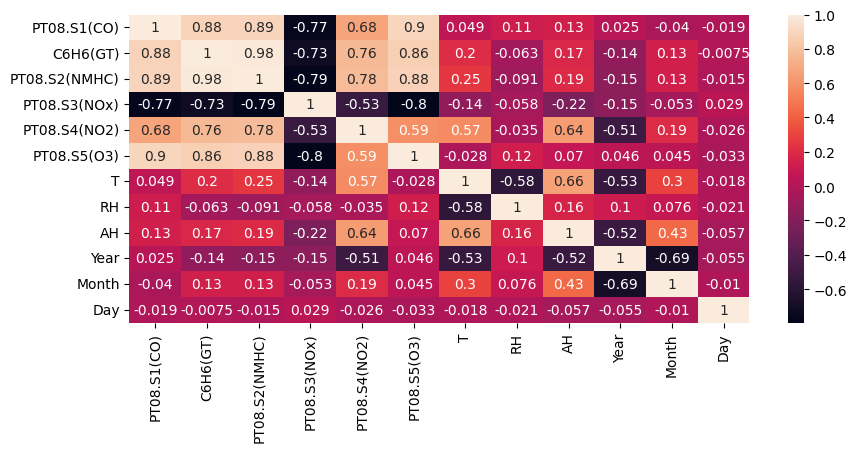

In [ ]:
# Create a heatmap of a correlation DataFrame of the air quality analysis dataset
plt.figure(figsize=(10,4))
sns.heatmap(air_data.iloc[:,1:-1].corr(),annot=True)
plt.show()

From the heatmap, we can see that, the dependent variable `RH` is moderately correlated with `T` and weakly correlated with carbon monoxide (`'PT08.S1(CO)'`), ozone (`'PT08.S5(O3)'`) , absolute humidity (`AH`) and year (`Year`).

Ideally, to build a multiple linear regression model to predict relative humidity, we should have considered carbon monoxide, ozone, absolute humidity and year independent variables only instead of considering all the independent variables. But among these 4 features:

- carbon monoxide and ozone are strongly correlated to each other.

- temperature and absolute humidity are moderately correlated to each other.

- temperature and year are moderately correlated to each other.

- absolute humidity and year are moderately correlated to each other.

The above four cases are examples of multicollinearity wherein the independent variables are correlated to each other.

**Again creating a correlation heatmap again between the above four features and the dependent variable.**

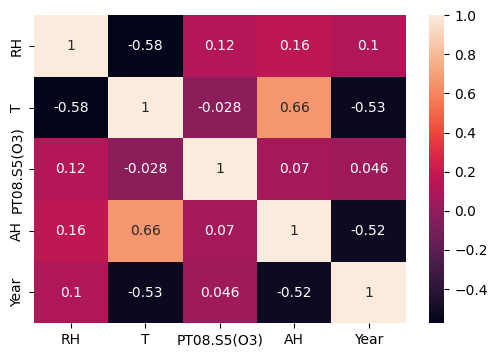

In [ ]:
# Create a correlation heatmap between 'RH', 'T', 'PT08.S1(CO)', 'PT08.S5(O3)', 'AH', 'Year' variables.
plt.figure(figsize=(6,4))
sns.heatmap(air_data[['RH','T','PT08.S5(O3)','AH',"Year"]].corr(),annot=True)
plt.show()

This multicollinearity causes redundancy because of which we cannot say for sure which of the independent variables are actually contributing to the prediction of the dependent variable.

In this case, to remove multicollinearity,

- Choose either `T` or `AH` as one of the independent variables. Since the correlation between `RH` and `T` is stronger compared to the correlation between `RH` and `AH`, let's choose `T`.

- Choose either `'PT08.S1(CO)'` or `'PT08.S5(O3)'` as one of the independent variables. Since the correlation between `RH` and `PT08.S5(O3)` is stronger compared to the correlation between `RH` and `'PT08.S1(CO)'`, let's choose `PT08.S5(O3)`.

- Drop `Year` as it is moderately correlated with `'T'`.

Let's create a correlation heatmap again to verify whether the multicollinearity is eliminated or not.

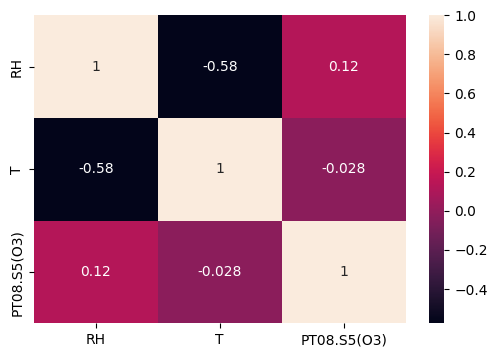

In [ ]:
# Create a correlation heatmap between 'RH', 'T', 'PT08.S5(O3)' variables.
plt.figure(figsize=(6,4))
sns.heatmap(air_data[['RH','T','PT08.S5(O3)']].corr(),annot=True)
plt.show()

**Analysis**-> Now that we have removed multicollinearity and selected the features that are likely to contribute best to the prediction of relative humidity values, let's build a linear regression model again using the `statsmodels.api` module.

In [ ]:
#  Build a linear regression model again with 'T' and 'PT08.S5(O3)' as independent variables to predict 'RH'.
X_train=X_train[["T","PT08.S5(O3)"]]
X_test=X_test[["T","PT08.S5(O3)"]]

# Add a constant to get the intercept
x_train_sm1=sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr1=sm.OLS(y_train,x_train_sm1).fit()

#  Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr1.params

const          64.733289
T              -1.118249
PT08.S5(O3)     0.004985
dtype: float64

In [ ]:
### Print the summary table to get all the parameters for the features used to build a linear regression model.
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1664.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:24:35   Log-Likelihood:                -25273.
No. Observations:                6269   AIC:                         5.055e+04
Df Residuals:                    6266   BIC:                         5.057e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          64.7333      0.607    106.684      

So even after removing multicollinearity, we are getting the same warning again.

So now we will be using some another technique to remove multicollinearity.

In [ ]:
# Buliding a linear regression model again with 'T', 'PT08.S5(O3)' and 'PT08.S1(CO)' as independent variables to predict 'RH'.
x=air_data[['T', 'PT08.S5(O3)','PT08.S1(CO)']]
y_test_predict=air_data[['T', 'PT08.S5(O3)','PT08.S1(CO)']]

# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.33,random_state=0)

# Adding a constant to get the intercept value
x_train_sm2=sm.add_constant(X_train)
print(x_train_sm2)

# Builidng a linear regression model using 'OLS'
lr2=sm.OLS(Y_train,x_train_sm2).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr2.params

      const     T  PT08.S5(O3)  PT08.S1(CO)
6404    1.0  18.0       1481.0       1338.0
6591    1.0  12.9       1060.0        996.0
7511    1.0  11.4       1725.0       1294.0
8626    1.0   4.4       1011.0       1009.0
5543    1.0  20.0       1195.0       1150.0
...     ...   ...          ...          ...
7891    1.0  13.7       1086.0       1037.0
9225    1.0  12.5        636.0        826.0
4859    1.0  17.1        650.0        769.0
3264    1.0  32.3        660.0       1034.0
2732    1.0  38.8        839.0       1099.0

[6269 rows x 4 columns]


const          53.424461
T              -1.154012
PT08.S5(O3)    -0.004873
PT08.S1(CO)     0.020040
dtype: float64

**Analysis**-> First, we have build a multiple linear regression model wherein $x_i$ is a target variable and it is a function of all the other feature variables as illustrated in the equation below.

$$x_1 = \beta_0^* + \beta_2^* x_2 + \beta_3^* x_3 + \beta_4^* x_4 + \dots + \beta_k^* x_k + \epsilon^*$$

Here,

- $x_1$ is a feature acting as the target (or dependent) variable in above equation

- $x_2, x_3, x_4, \dots , x_k$ are independent variables or features

- $\beta_0^*, \beta_2^*, \beta_3^*, \dots, \beta_k^*$ are the corresponding regression coefficients of the independent variables in the above linear regression equation

- **$\epsilon^*$** is the random error obtained along with the predicted value

In [ ]:
# PrintPrint the summary table for the above linear regression model.
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:24:36   Log-Likelihood:                -25215.
No. Observations:                6269   AIC:                         5.044e+04
Df Residuals:                    6265   BIC:                         5.047e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          53.4245      1.209     44.206      

**Analysis**-> First, we have build a multiple linear regression model wherein $x_i$ is a target variable and it is a function of all the other feature variables as illustrated in the equation below.

$$x_1 = \beta_0^* + \beta_2^* x_2 + \beta_3^* x_3 + \beta_4^* x_4 + \dots + \beta_k^* x_k + \epsilon^*$$

Here,

- $x_1$ is a feature acting as the target (or dependent) variable in above equation

- $x_2, x_3, x_4, \dots , x_k$ are independent variables or features

- $\beta_0^*, \beta_2^*, \beta_3^*, \dots, \beta_k^*$ are the corresponding regression coefficients of the independent variables in the above linear regression equation

- **$\epsilon^*$** is the random error obtained along with the predicted value

Again there is multicollinearity between the independent variables so to remove this multicollinearity we will use the concept of variance inflation factor.

####**Variance Inflation Factor**

Variance Infation Factor (VIF) is a way to detect multicollinearity between independent variables in a dataset. We calculate the VIF values to measure the extent of multicollinearity between the independent variables.  

For $k$ different independent variables, we can calculate $k$ different VIFs (one for each $x_i$ where $i = 1, 2, 3, \dots, k$) in three steps:

**Step one**

First, build a multiple linear regression model wherein $x_i$ is a target variable and it is a function of all the other feature variables as illustrated in the equation below.

$$x_1 = \beta_0^* + \beta_2^* x_2 + \beta_3^* x_3 + \beta_4^* x_4 + \dots + \beta_k^* x_k + \epsilon^*$$

Here,

- $x_1$ is a feature acting as the target (or dependent) variable in above equation

- $x_2, x_3, x_4, \dots , x_k$ are independent variables or features

- $\beta_0^*, \beta_2^*, \beta_3^*, \dots, \beta_k^*$ are the corresponding regression coefficients of the independent variables in the above linear regression equation

- **$\epsilon^*$** is the random error obtained along with the predicted value

**Step two**

Then, calculate the VIF for $x_{i}$ using the following formula:

$$\text{VIF}_{i} = \frac{1}{1-R_{i}^{2}}$$

where $R^2 _i$ is the coefficient of determination of the regression equation in step one, with $x_{1}$ on the left hand side, and all other independent variables on the right hand side.

**Step three**

Analyse the extent of multicollinearity by considering the magnitude of the $\text{VIF}_{i}$. **A rule of thumb is that if $\text{VIF}_{i} > 10$, then multicollinearity is high. In that case, the $x_i$ feature must be dropped to predict the values of the target (or dependent) variable.** A cutoff of 5 is also commonly used.

Let's learn this concept with the help of an example. Let's build a linear regression model to predict relative humidity values from `T` and `PT08.S5(O3)`	values. Let's add one more feature say `'PT08.S1(CO)'` to the prediction model because ozone and carbon monoxide are highly correlated to each other and relative humidity is correlated to carbon monoxide as well.

Then we will calculate the VIF values for `T, PT08.S5(O3)` and `'PT08.S1(CO)'` independent variables first using the `variance_inflation_factor` function of the `statsmodels.stats.outliers_influence` module and then using $\frac{1}{1 - R^2}$ formula.


Step 1- Building the regression model

In [ ]:
# Calculate the VIF values for 'T', 'PT08.S5(O3)' and 'PT08.S1(CO)' independent variables using the 'variance_inflation_factor' function.
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['features']=x_train_sm2.columns
vif['VIF']=[variance_inflation_factor(x_train_sm2.values,i) for i in range(x_train_sm2.values.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=True)
print(vif)

      features    VIF
1            T   1.03
2  PT08.S5(O3)   5.39
3  PT08.S1(CO)   5.40
0        const  50.15


**Analysis**-> As you can see the VIF values for `const` is very high.

Let's calculate the VIF values using the $\frac{1}{1 - R^2}$ formula. But before that, let's build a linear regression model again taking ozone as the dependent variable and temperature and carbon monoxide as the independent variables. Then calculate the $R^2$ value for this model.

**Building a linear regression model taking 'PT08.S5(O3)' as the target and 'T' and 'PT08.S1(CO)' as the independent variables and calculating the value of vif using the $\frac{1}{1 - R^2}$ formula.**

In [ ]:
# Build a linear regression model taking 'PT08.S5(O3)' as the target and 'T' and 'PT08.S1(CO)' as the independent variables.
X_train_ozone=X_train[['T','PT08.S1(CO)' ]]
Y_train_ozone=X_train['PT08.S5(O3)']

ozone_x_train_sm=sm.add_constant(X_train_ozone)

ozone_lr=sm.OLS(Y_train_ozone,ozone_x_train_sm).fit()
print(ozone_lr.params)
print()
print(ozone_lr.summary())

const         -741.795590
T               -3.117549
PT08.S1(CO)      1.655525
dtype: float64

                            OLS Regression Results                            
Dep. Variable:            PT08.S5(O3)   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 1.375e+04
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:24:36   Log-Likelihood:                -41037.
No. Observations:                6269   AIC:                         8.208e+04
Df Residuals:                    6266   BIC:                         8.210e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
# Calculate the VIF value for ozone where ozone is the dependent variable.
ozone_vif= 1 / (1-0.814)
print('Variance Inflation Factor for Ozone: ',ozone_vif)

Variance Inflation Factor for Ozone:  5.376344086021504


**Building a linear regression model taking 'T' as the target and 'T' and 'PT08.S1(CO)' and 'PT08.S5(O3)' as the independent variables and calculating the value of vif using the $\frac{1}{1 - R^2}$ formula.**

In [ ]:
# Build a linear regression model taking 'T' as the target and 'T' and 'PT08.S1(CO)' and 'PT08.S5(O3)' as the independent variables.
X_train_temp=X_train[['PT08.S1(CO)' and 'PT08.S5(O3)']]
Y_train_temp=X_train['T']

x_train_temp_sm=sm.add_constant(X_train_temp)
lr_temp=sm.OLS(Y_train_temp,x_train_temp_sm).fit()
print(lr_temp.params)
print()
print(lr_temp.summary())

const          18.624459
PT08.S5(O3)    -0.000432
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.380
Date:                Sun, 07 Apr 2024   Prob (F-statistic):              0.123
Time:                        07:24:36   Log-Likelihood:                -22441.
No. Observations:                6269   AIC:                         4.489e+04
Df Residuals:                    6267   BIC:                         4.490e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
# Calculate the VIF value for temperature where temperature is the dependent variable.
vif_temp=1/(1-0.00)
print('Variance Inflation Factor for Temperature: ',vif_temp)

Variance Inflation Factor for Temperature:  1.0


**Calculating the VIF values for the independent variables in the linear regression model that we have  built with 'T' and 'PT08.S5(O3)' as independent variables to predict 'RH'.**





In [ ]:
# Calculate the VIF values for the independent variables in the linear regression model built in the previous class.

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = x_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm1.values, i)
                    for i in range(x_train_sm1.values.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,12.41
1,T,1.00
2,PT08.S5(O3),1.00


In [ ]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                     RH   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1664.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:24:36   Log-Likelihood:                -25273.
No. Observations:                6269   AIC:                         5.055e+04
Df Residuals:                    6266   BIC:                         5.057e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          64.7333      0.607    106.684      

**Analysis**> Here, the `const` (short for **constant**) is an additional feature that we add before building a linear regression module. It has all the values as $1$. So, `const` is causing multicollinearity.

Ideally, we should drop `const` because the VIF value for it is greater than 10. But we cannot drop it, because using this feature we get the $\beta_0$ value.

So now let's look at the final linear regression model that we have built after selecting the final features that are supposed to predict the relative humidity values.




Hence, to predict relative humidity values, the final linear regression model that you get after going through so much effort is

$$\text{relative humidity} = 64.7333 - 1.1182 \space{} \text{temperature} + 0.0050 \space{} \text{ozone}$$

or

$$\text{RH} = 64.7333 - 1.1182 \space{} \text{T} + 0.0050 \space{} \text{O}_3$$

We can create a function that can predict relative humidity values using the temperature and ozone values.

In [ ]:
#  Create a function that can predict relative humidity values using the temperature and ozone values.
def relative_humidity(temperature,ozone):
  rh=64.7333+(-1.1182)*temperature+0.0050*ozone
  return rh

predicted_rh=relative_humidity(30,900)
print("Predicted Relative Humidity: ",predicted_rh)

Predicted Relative Humidity:  35.6873


####**Rebuilding Linear Regression Model Using The sklearn Module**

In [ ]:
# Rebuild the above linear regression model again using the sklearn module and then print  𝑅2 , MSE, RMSE and MAE values.
x_train=X_train[['T', 'PT08.S5(O3)']]

y_train_reshaped=y_train.values.reshape(-1,1)
y_test_reshaped=y_test.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
final_lin_reg=LinearRegression()
final_lin_reg.fit(x_train,y_train_reshaped)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{final_lin_reg.intercept_[0]:.4f}")

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X_train.columns.values, final_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.4f}")


Constant       64.7333
T               -1.1182
PT08.S5(O3)     0.0050


**Analysis**-> For providing training or fitting the model to the training set, we have imported the LinearRegression class from the linear_model module of the sklearn library.

After importing the class, we have created a regressor object and use it to fit the model to the LinearRegression class.
The value of the coefficients for temperature and ozone are -1.1182 and 0.0050. The constant is 64.7333.

In [ ]:
#### Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
x_test = X_test[['T', 'PT08.S5(O3)']]

final_y_train_pred = final_lin_reg.predict(x_train)
final_y_test_pred = final_lin_reg.predict(x_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, final_y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, final_y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, final_y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, final_y_train_pred):.3f}")

print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, final_y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, final_y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, final_y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, final_y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.347
Mean Squared Error: 185.854
Root Mean Squared Error: 13.633
Mean Absolute Error: 11.056


Test Set
--------------------------------------------------
R-squared: 0.337
Mean Squared Error: 195.796
Root Mean Squared Error: 13.993
Mean Absolute Error: 11.341


**Analysis**-> In the above cells we have evaluated the r- squared error, absolute mean error, mean squared error and root mean squared error for both the train and test sets.


The closer the MSE, RMSE and MAE values are to zero, the better is accuracy of a regression-based prediction model. However, in the case of fractional values (or values between 0 and 1), MAE is a better metric to evaluate the accuracy of a regression-based prediction model. This is because squaring fractional values will take them even more close to zero, e.g.  0.1^2=0.01


here the mse,rmse,mae values are not 0 which means errors are not 0 so the model is not good and r^2 must be equal to 1 for better performance of the model.

**Analysis**-> We built the linear regression model with temperature and ozone as the independent variable, the $R^2$ value obtained is 34.7% approximately but  the $R^2$ value should be close to 1. The MSE, RMSE and MAE values are also not too high.



As we can see, there is hardly any improvement in the performance of the linear regression model after considering ozone as another independent variables to predict the relative humidity values. Hence, we can conclude either of the following from this result:

1. In general, the relative humidity values cannot be predicted accurately using temperature and ozone.

2. In particular, the linear regression model cannot accurately predict the relative humidity values from the ozone and temperature values.

It might happen many a times that a particular problem cannot be solved using a particlar machine learning algorithm. Hence, we might have to use other algorithms to solve that problem. By experience i.e. by solving more and more problems, we will learn to apply the most appropriate machine learning algorithm to solve a problem.





---



---



---

